# EDA для задачи предсказания результатов экзаменов учеников 

Чтение и импорт данных нужных библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
df = pd.read_csv('/Users/vlv/Downloads/stud_math.csv')
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


## 1. Осмотр датасета и первичная обработка столбцов

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Посмотрим на количество пропущенных значений:

In [4]:
df.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

Найдем процент пропущенных значений в датасете:

In [5]:
count_nan = (len(df) - df.count()).sum()
percent_nan = (count_nan * 100) / df.count().sum()
display(round(percent_nan, 2))

5.01

Датасет содержит данные о 395 учениках, в датасете 30 колонок-признаков, где school, sex, age заполнены значениями полностью (вероятно, это были обязательные поля для заполнения в опросе). Остальные же имеют пропущенные значения, которых немного относительно общего количества — 5%.

Столбец school
Уникальных значений: 2


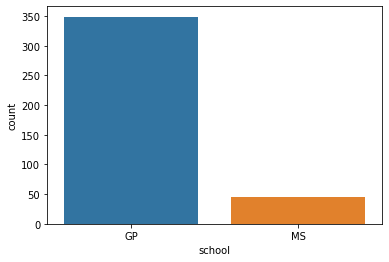

Столбец sex
Уникальных значений: 2


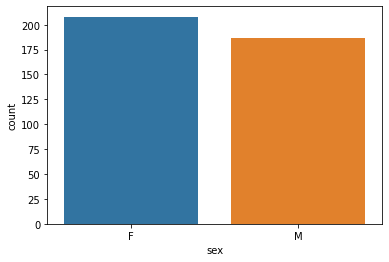

Столбец age
Среднее: 16.696202531645568
 Медиана:17.0
 Мода:16
 25-й перцентиль: 16.0
 75-й перцентиль: 18.0
 IQR: 2.0


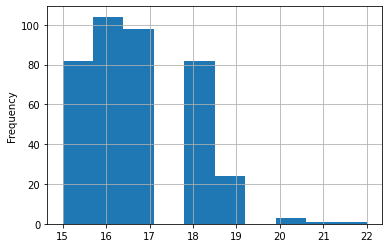

Столбец address
Уникальных значений: 2


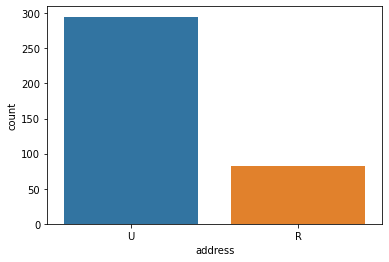

Столбец famsize
Уникальных значений: 2


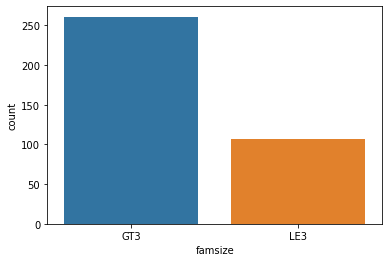

Столбец Pstatus
Уникальных значений: 2


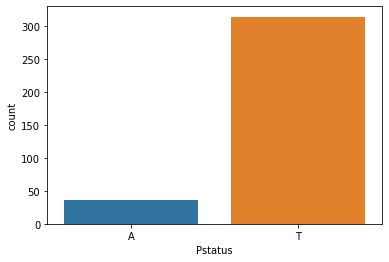

Столбец Medu
Среднее: 2.75
 Медиана:3.0
 Мода:4.0
 25-й перцентиль: 2.0
 75-й перцентиль: 4.0
 IQR: 2.0


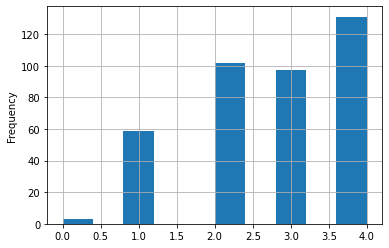

Столбец Fedu
Среднее: 2.61455525606469
 Медиана:2.0
 Мода:2.0
 25-й перцентиль: 2.0
 75-й перцентиль: 3.0
 IQR: 1.0


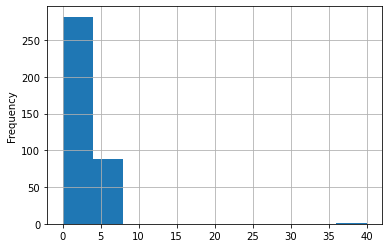

Столбец Mjob
Уникальных значений: 5


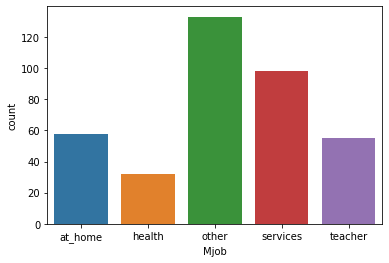

Столбец Fjob
Уникальных значений: 5


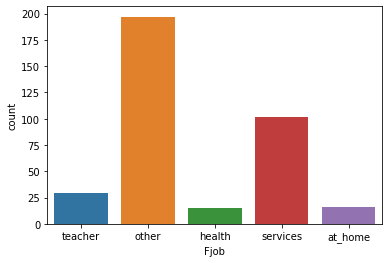

Столбец reason
Уникальных значений: 4


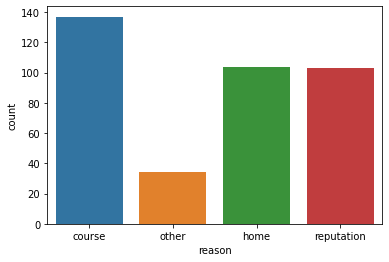

Столбец guardian
Уникальных значений: 3


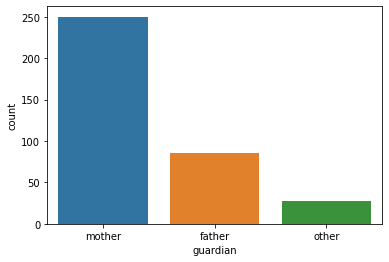

Столбец traveltime
Среднее: 1.438692098092643
 Медиана:1.0
 Мода:1.0
 25-й перцентиль: 1.0
 75-й перцентиль: 2.0
 IQR: 1.0


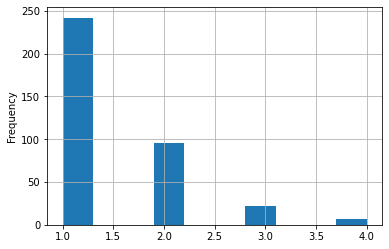

Столбец studytime
Среднее: 2.038659793814433
 Медиана:2.0
 Мода:2.0
 25-й перцентиль: 1.0
 75-й перцентиль: 2.0
 IQR: 1.0


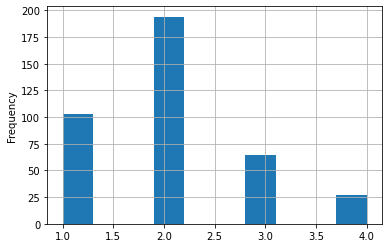

Столбец failures
Среднее: 0.3378016085790885
 Медиана:0.0
 Мода:0.0
 25-й перцентиль: 0.0
 75-й перцентиль: 0.0
 IQR: 0.0


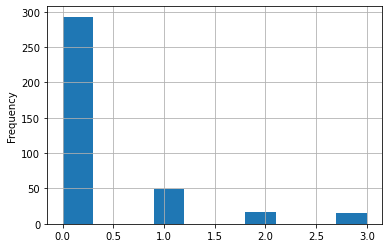

Столбец schoolsup
Уникальных значений: 2


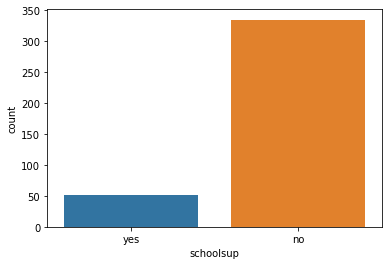

Столбец famsup
Уникальных значений: 2


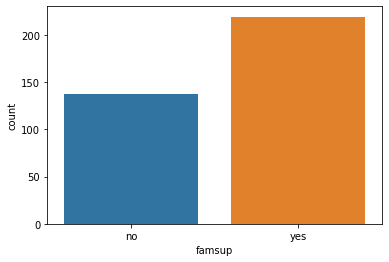

Столбец paid
Уникальных значений: 2


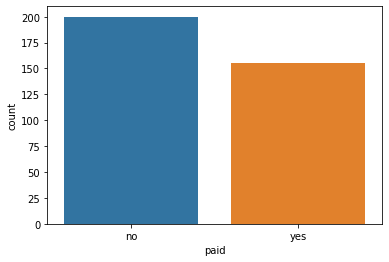

Столбец activities
Уникальных значений: 2


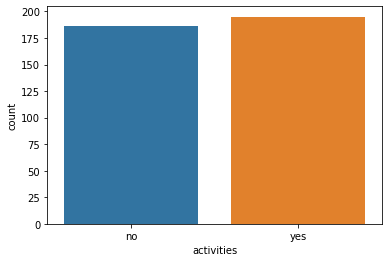

Столбец nursery
Уникальных значений: 2


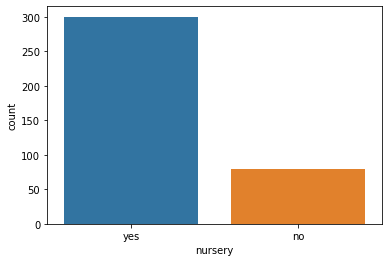

Столбец studytime, granular
Среднее: -6.115979381443299
 Медиана:-6.0
 Мода:-6.0
 25-й перцентиль: -6.0
 75-й перцентиль: -3.0
 IQR: 3.0


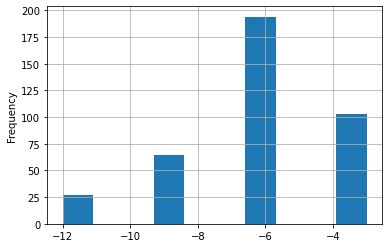

Столбец higher
Уникальных значений: 2


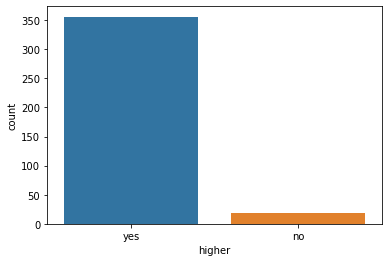

Столбец internet
Уникальных значений: 2


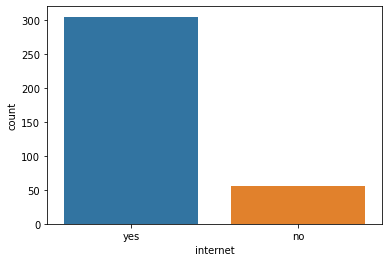

Столбец romantic
Уникальных значений: 2


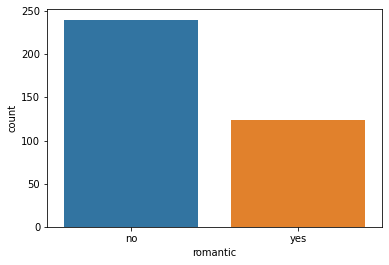

Столбец famrel
Среднее: 3.9375
 Медиана:4.0
 Мода:4.0
 25-й перцентиль: 4.0
 75-й перцентиль: 5.0
 IQR: 1.0


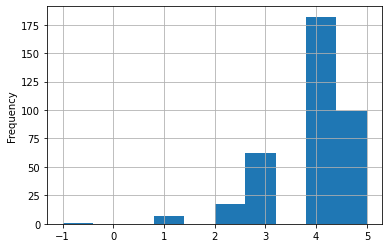

Столбец freetime
Среднее: 3.2317708333333335
 Медиана:3.0
 Мода:3.0
 25-й перцентиль: 3.0
 75-й перцентиль: 4.0
 IQR: 1.0


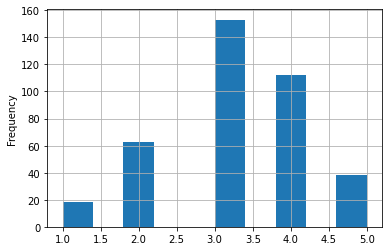

Столбец goout
Среднее: 3.1059431524547803
 Медиана:3.0
 Мода:3.0
 25-й перцентиль: 2.0
 75-й перцентиль: 4.0
 IQR: 2.0


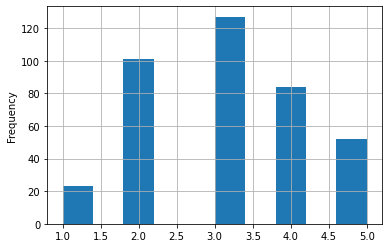

Столбец health
Среднее: 3.531578947368421
 Медиана:4.0
 Мода:5.0
 25-й перцентиль: 3.0
 75-й перцентиль: 5.0
 IQR: 2.0


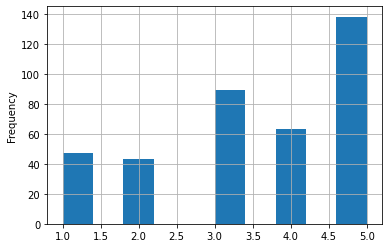

Столбец absences
Среднее: 7.2793733681462145
 Медиана:4.0
 Мода:0.0
 25-й перцентиль: 0.0
 75-й перцентиль: 8.0
 IQR: 8.0


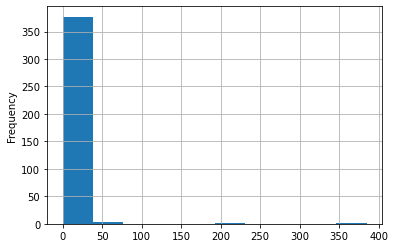

Столбец score
Среднее: 52.26221079691517
 Медиана:55.0
 Мода:50.0
 25-й перцентиль: 40.0
 75-й перцентиль: 70.0
 IQR: 30.0


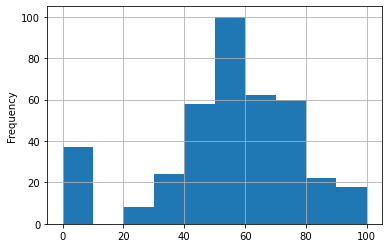

In [6]:
# Рассмотрим распределение признаков

def first_look(col, boundaries=None):
    print('Столбец', col)
    fig, axes = plt.subplots()
    # проверка на строковый тип данных
    if df.loc[:, col].dtypes == np.dtype('O'):
        # построение гистограммы для номинативных признаков
        sns.countplot(df.loc[:, col], data=df)
        print(f'Уникальных значений: {df.loc[:, col].nunique()}')
        plt.show()
    else:
        perc25 = df.loc[:, col].quantile(0.25)
        perc75 = df.loc[:, col].quantile(0.75)
        IQR = perc75 - perc25
        print(
            f'Среднее: {df.loc[:, col].mean()}\n',
            f'Медиана:{df.loc[:, col].median()}\n',
            f'Мода:{df.loc[:, col].mode()[0]}\n',
            f'25-й перцентиль: {perc25}\n',
            f'75-й перцентиль: {perc75}\n',
            f'IQR: {IQR}')
        # построение гистограммы для количественных признаков
        df.loc[:, col].plot(kind='hist', grid=True)
        plt.show()


first_look('school')
first_look('sex')
first_look('age')
first_look('address')
first_look('famsize')
first_look('Pstatus')
first_look('Medu')
first_look('Fedu')
first_look('Mjob')
first_look('Fjob')
first_look('reason')
first_look('guardian')
first_look('traveltime')
first_look('studytime')
first_look('failures')
first_look('schoolsup')
first_look('famsup')
first_look('paid')
first_look('activities')
first_look('nursery')
first_look('studytime, granular')
first_look('higher')
first_look('internet')
first_look('romantic')
first_look('famrel')
first_look('freetime')
first_look('goout')
first_look('health')
first_look('absences')
first_look('score')

Столбцы, которые вызывают интерес:

school(школа) — в опросе участвовала большая часть учеников из одной школы (GP), поэтому выборку учеников можно считать нерепрезентативной, то есть большинство учеников представляют интересы школы GP и у нас мало информации об учениках из MS, поэтому включать школу в анализ не имеет особого смысла. Для последующего построения модели такие данные скорее не подходят, чем подходят. Если мы хотим учесть школу в последующем анализе, нужно получить побольше данных от учеников из школы MS.

Pstatus (совместное жилье родителей) — такая же ситуация, как со школой: большинство оценок от школьников, где родители живут вместе.

Fedu (образование отца) — есть значение, которое значительно выходит за рамки шкалы оценок, вероятно, это ошибка в данных. Значение можно заменить на моду.

failures (количество внеучебных неудач) — не совсем понятно, что подразумевается под диапазоном от 0 до 3. Нужно больше информации о трактовке шкале неудач. Исключаем из датасета

schoolsup (дополнительная образовательная поддержка) — большинство опрошенных не получало дополнительную образовательную поддержку, соответственно, у нас мало данных от тех, кто ее получал. Нет особого смысла включать ее в построение модели.

studytime, granular (нет описания) — возможно, это тоже самое что и studytime. Пока непонятно, почему этот значения этого признака отрицательные. Возьмем во внимание данный признак на корреляционном анализе.

famrel (семейные отношения, шкала от 1 до 5) — есть значение, которое выходит за рамки шкалы оценки, похоже на ошибку, так как оно отрицательное. Можно заменить на моду.

absences (количество пропущенных занятий) — основное распределение лежит между 0 и 8 занятиями, но присутствуют значения, которые значительно выходят за основное распределение - это потенциальные выбросы. 

score (баллы по госэкзамену по математике) — достаточно много значений "0" и странно, что нет значений от "0" до "20". Оставим данные в датасете, пусть будет допущение, что 0 - это оценка, когда школьник не набрал минимальный балл или не явился на экзамен.

## 2. Анализ и удаление выбросов

Исключим из датасета school и Psatus:

In [7]:
df.drop(['school', 'Pstatus'], inplace=True, axis=1)

Найдем значение выброса в столбце Fedu:


In [9]:
Q3_fedu = df['Fedu'].quantile(q=0.75, interpolation='midpoint')
Q1_fedu = df['Fedu'].quantile(q=0.25, interpolation='midpoint')
IQR_fedu = Q3_fedu - Q1_fedu

df.loc[~df.Fedu.between(Q1_fedu - 1.5*IQR_fedu,
                        Q3_fedu + 1.5*IQR_fedu), 'Fedu']

11     40.0
21      NaN
42      NaN
46      NaN
57      NaN
58      NaN
67      NaN
76      0.0
137     NaN
142     NaN
159     NaN
161     NaN
171     0.0
180     NaN
195     NaN
232     NaN
236     NaN
259     NaN
280     NaN
281     NaN
286     NaN
287     NaN
290     NaN
310     NaN
328     NaN
349     NaN
374     NaN
Name: Fedu, dtype: float64

Видим, что выброс — значение "40". Вероятнее всего, тут должна быть 4, так как шкала образования отца от 0 до 4. Но мы наверняка не знаем, поэтому заменим выброс на самое часто встречаемое значение:

In [8]:
df.loc[11, 'Fedu'] = df['Fedu'].mode()[0]

Просмотрим еще раз распределение Fedu, чтобы убедиться, что мы убрали выброс:

Столбец Fedu
Среднее: 2.512129380053908
 Медиана:2.0
 Мода:2.0
 25-й перцентиль: 2.0
 75-й перцентиль: 3.0
 IQR: 1.0


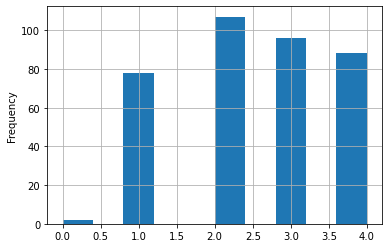

In [9]:
first_look('Fedu')

Исключим из датасета столбец failures:

In [10]:
df.drop('failures', inplace=True, axis=1)

Найдем значение выброса в столбце famrel:

In [11]:
Q3_famrel = df['famrel'].quantile(q=0.75, interpolation='midpoint')
Q1_famrel = df['famrel'].quantile(q=0.25, interpolation='midpoint')
IQR_famrel = Q3_famrel - Q1_famrel

df.loc[~df.famrel.between(Q1_famrel - 1.5*IQR_famrel,
                          Q3_famrel + 1.5*IQR_famrel), 'famrel']

8      NaN
12     NaN
20     NaN
25    -1.0
27     2.0
      ... 
360    NaN
363    2.0
373    NaN
389    1.0
391    2.0
Name: famrel, Length: 52, dtype: float64

Нужно обратить внимание, что значения "1" и "2" тоже попадают под выброс, но они не сильно далеко ушли от основного распределения и имеют место быть. Заменим на моду только значение "-1":

In [12]:
df.loc[25, 'famrel'] = df['famrel'].mode()[0]

Просмотрим еще раз распределение famrel, чтобы убедиться, что мы убрали выброс:

Столбец famrel
Среднее: 3.9510869565217392
 Медиана:4.0
 Мода:4.0
 25-й перцентиль: 4.0
 75-й перцентиль: 5.0
 IQR: 1.0


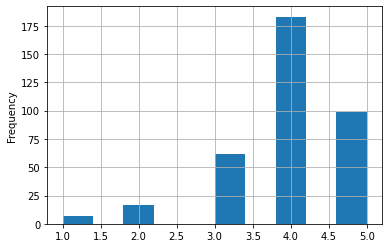

In [13]:
first_look('famrel')

Найдем значение выброса в столбце absences:

In [14]:
Q3_abs = df['absences'].quantile(q=0.75, interpolation='midpoint')
Q1_abs = df['absences'].quantile(q=0.25, interpolation='midpoint')
IQR_abs = Q3_abs - Q1_abs

df.loc[~df.absences.between(
    Q1_abs - 1.5*IQR_abs, Q3_abs + 1.5*IQR_abs), 'absences']

24       NaN
40      25.0
74      54.0
101      NaN
103     26.0
120      NaN
129      NaN
150      NaN
172      NaN
183     56.0
198     24.0
205     28.0
215      NaN
216     22.0
222    385.0
227      NaN
254      NaN
260     21.0
265      NaN
270      NaN
276     75.0
277     22.0
280     30.0
307     38.0
313     22.0
315     40.0
320     23.0
352      NaN
390    212.0
Name: absences, dtype: float64

Обратим внимание, что в списке значений выбросов присутствуют два аномальных значения: 385 и 212. Здравый смысл подсказывает, что 385 - это больше, чем дней в году, а 212 вероятнее всего, больше, чем рекомендуемое количество часов занятий по математике. Также мы видим и другие значения, попавшие под выброс (от 24часов до 75часов). Можно оставить для построения дальнейшей модели значения < 40 (они выглядят достаточно правдоподобно) и исключить 385 и 212:

In [15]:
df = df.loc[df.absences <= 40]

Просмотрим еще раз распределение absences, чтобы убедиться, что мы убрали выброс:

Столбец absences
Среднее: 5.306878306878307
 Медиана:4.0
 Мода:0.0
 25-й перцентиль: 0.0
 75-й перцентиль: 8.0
 IQR: 8.0


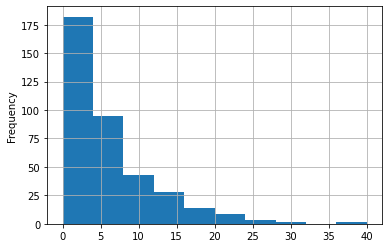

In [16]:
first_look('absences')

## 3. Корреляционный анализ

Выясним, какие столбцы коррелируют с баллами за ЕГЭ по математике с помощью корреляционной матрицы.
Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

<AxesSubplot:>

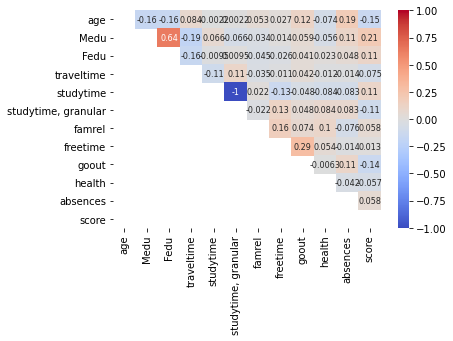

In [17]:
matrix = np.tril(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix, fmt='.2g',
            vmin=-1, vmax=1, center=0, cmap='coolwarm', annot_kws={"fontsize": 8})

Наблюдение: довольно хорошо коррелируют между собой образование матери и отца (прямо пропорционально), то есть если у матери высокое образование, то и отец скорее всего имеет такое же, и наоборот. Но нам в данном случае эта информация не пригодится для построения модели.

Также есть небольшая зависимость свободного времени после школы и проведения времени с друзьями (freetime и goout). Это говорит о том, что школьники посвящают немного свободного времени общению с друзьями, и чем его больше, тем больше общения и наоборот.

Рассмотрим внимательнее studytime и studytime, granular:

Text(0.5, 1.0, 'Время на учебу помимо школы\n VS\n Загадочный признак')

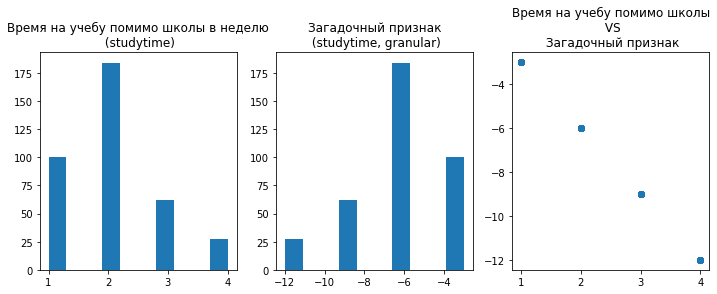

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(df['studytime'])
axes[0].set_title('Время на учебу помимо школы в неделю\n (studytime)')

axes[1].hist(df['studytime, granular'])
axes[1].set_title('Загадочный признак\n (studytime, granular)')

axes[2].scatter(x=df['studytime'], y=df['studytime, granular'], marker='o')
axes[2].set_title('Время на учебу помимо школы\n VS\n Загадочный признак')

Признаки studytime и studytime, granular скоррелированы полностью обратно пропорционально, один можно исключить. 
Пусть это будет studytime, granular:

In [19]:
df.drop(['studytime, granular'], inplace=True, axis=1)

Выберем для построения модели наиболее коррелирующие с баллами колонки: age (возраст), Medu (образование матери), Fedu (образование отца), studytime (время на учебу помимо школы), goout (время с друзьями). Остальные колонки можно отсечь:

In [20]:
df.drop(['traveltime', 'famrel', 'freetime',
         'health', 'absences'], inplace=True, axis=1)

Посмотрим на данные, оставшиеся после корреляционного анализа:

In [21]:
df.head(10)

,sex,age,address,famsize,Medu,Fedu,Mjob,Fjob,reason,guardian,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,goout,score
0,F,18,U,NaN,4.0,4.0,at_home,teacher,course,mother,2.0,yes,no,no,no,yes,yes,NaN,no,4.0,30.0
1,F,17,U,GT3,1.0,1.0,at_home,other,course,father,2.0,no,yes,no,no,no,yes,yes,no,3.0,30.0
2,F,15,U,LE3,1.0,1.0,at_home,other,other,mother,2.0,yes,no,NaN,no,yes,yes,yes,NaN,2.0,50.0
3,F,15,U,GT3,4.0,2.0,health,NaN,home,mother,3.0,no,yes,yes,yes,yes,yes,yes,yes,2.0,75.0
4,F,16,U,GT3,3.0,3.0,other,other,home,father,2.0,no,yes,yes,no,yes,yes,no,no,2.0,50.0
5,M,16,U,LE3,4.0,3.0,services,other,reputation,mother,2.0,no,yes,yes,yes,yes,yes,yes,no,2.0,75.0
6,M,16,NaN,LE3,2.0,2.0,other,other,home,mother,2.0,no,no,no,no,yes,yes,yes,no,4.0,55.0
7,F,17,U,GT3,4.0,4.0,other,teacher,home,mother,2.0,yes,yes,no,no,yes,yes,no,no,4.0,30.0
8,M,15,U,LE3,3.0,2.0,services,other,home,mother,2.0,no,yes,yes,no,yes,yes,yes,no,2.0,95.0
9,M,15,U,NaN,3.0,4.0,other,other,home,mother,2.0,no,yes,yes,yes,yes,yes,yes,no,1.0,75.0


## 4. Номинативный анализ с тестом Стьюдента

Проведем анализ строковых значений, чтобы узнать, какие признаки на фоне остальных больше всего коррелируют с оценкой экзамена по математике.

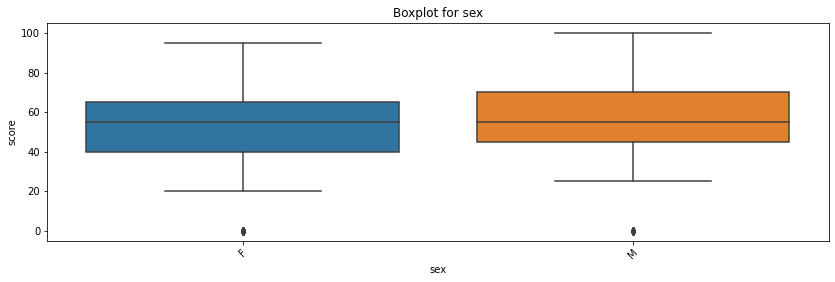

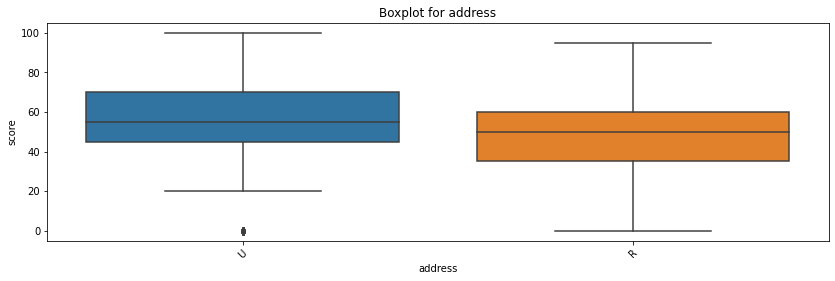

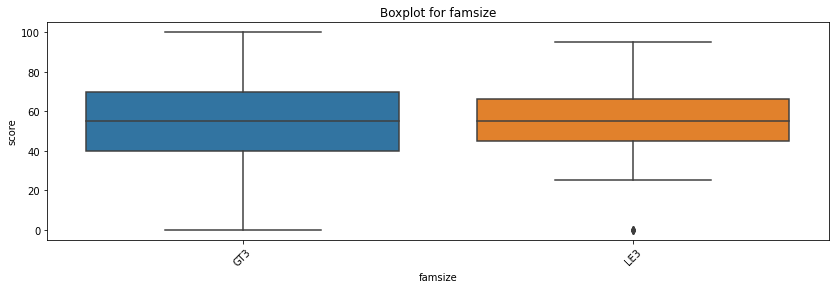

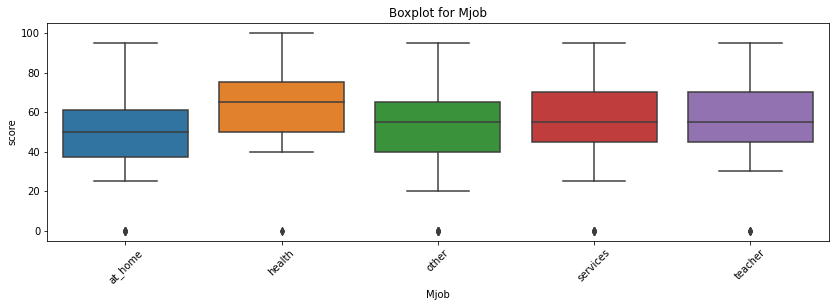

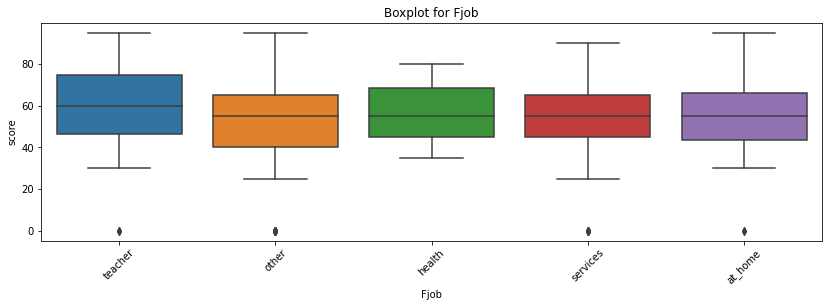

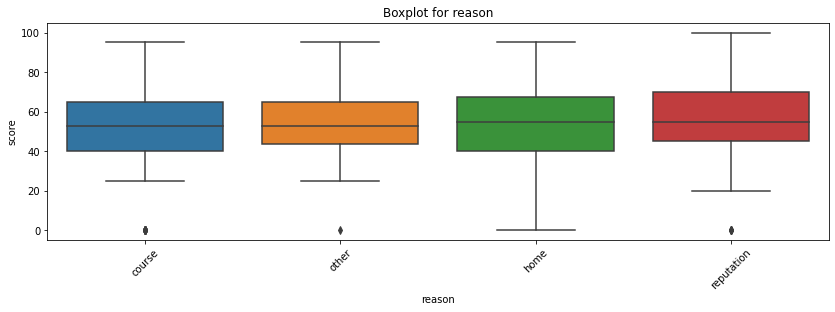

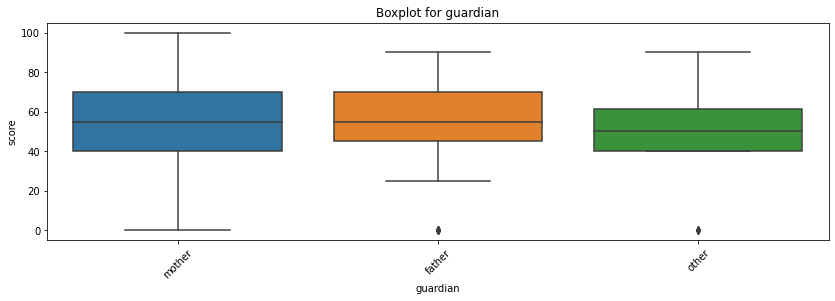

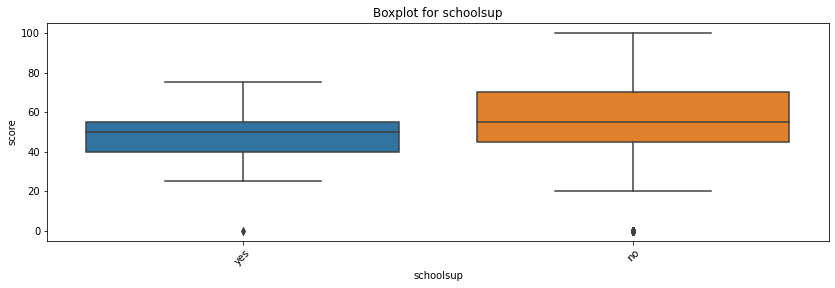

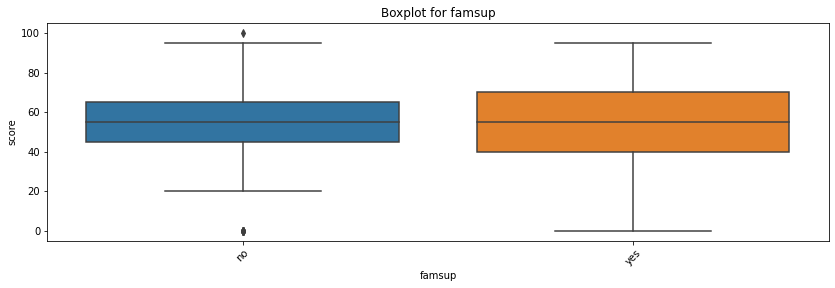

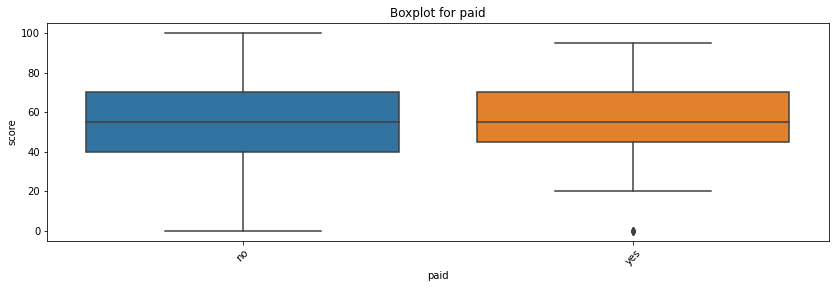

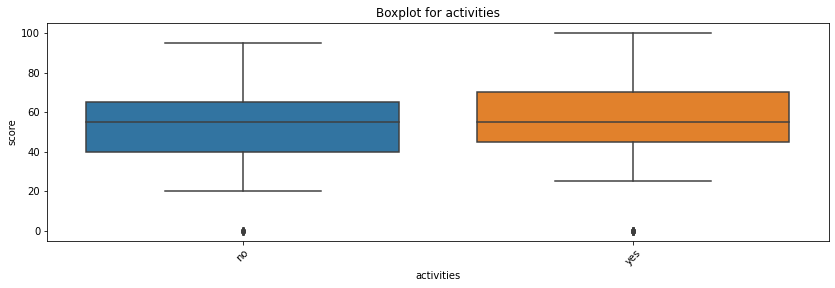

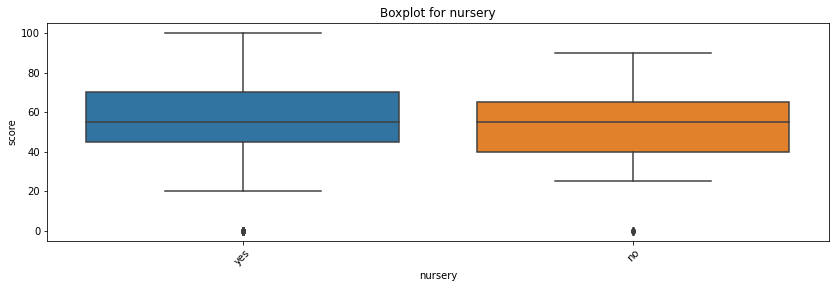

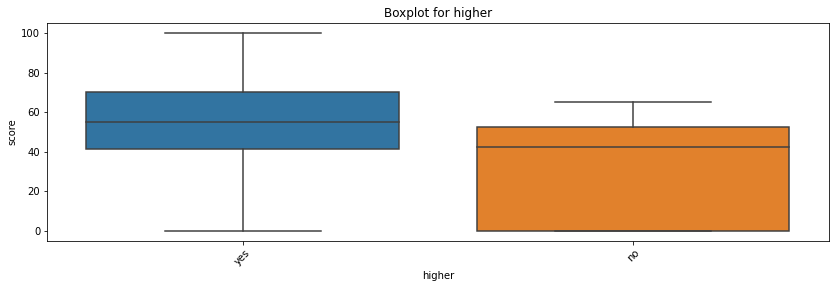

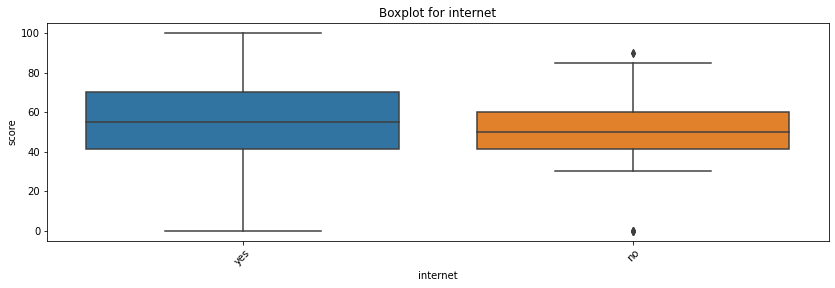

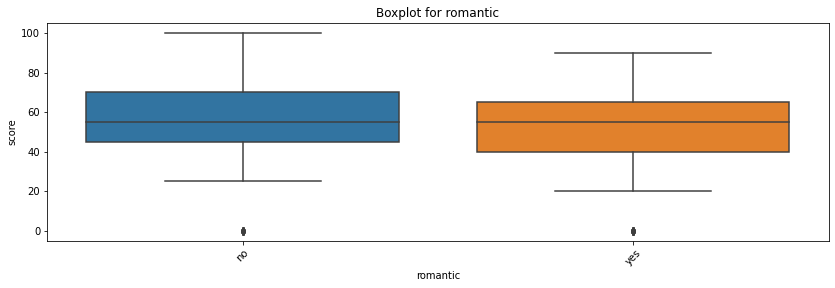

In [22]:
# Номинативный анализ
def get_boxplot(col):
    # проверка на строковый тип данных
    if df.loc[:, col].dtypes == np.dtype('O'):
        fig, ax = plt.subplots(figsize=(14, 4))
        sns.boxplot(x=col, y='score',  # построение графиков вида boxplot
                    data=df,
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + col)
        plt.show()


for col in df.columns:
    get_boxplot(col)

Рассмотрим графики Mjob и Fjob. Среди пяти графиков визуально выбивается по одному значению — для Mjob это значение health, для Fjob — значение teacher. То есть школьники, у которых матери заняты в сфере здоровья, а отцы — учителя, лучше сдают экзамен по математике, чем школьники, у которых родители работают в иной сфере (но это применимо только к данному датасету!).

На основании этого мы можем объединить остальные четыре сферы профессий в одну группу - other, так как они примерно одинаково коррелируют с оценкой экзамена по математике:

In [27]:
def replace(Fjob):
    if (Fjob == 'other' or Fjob == 'health' or Fjob == 'services' or Fjob == 'at_home'):
        return 'other'
    else:
        return 'teacher'


df.Fjob = df.Fjob.apply(replace)
display(df.Fjob)

0      teacher
1        other
2        other
3      teacher
4        other
        ...   
389      other
391      other
392      other
393      other
394      other
Name: Fjob, Length: 378, dtype: object

In [25]:
def replace(Mjob):
    if (Mjob == 'other' or Mjob == 'teacher' or Mjob == 'services' or Mjob == 'at_home'):
        return 'other'
    else:
        return 'health'


df.Mjob = df.Mjob.apply(replace)
display(df.Mjob)

0       other
1       other
2       other
3      health
4       other
        ...  
389     other
391     other
392     other
393     other
394     other
Name: Mjob, Length: 378, dtype: object

Посмотрим на боксплоты еще раз:

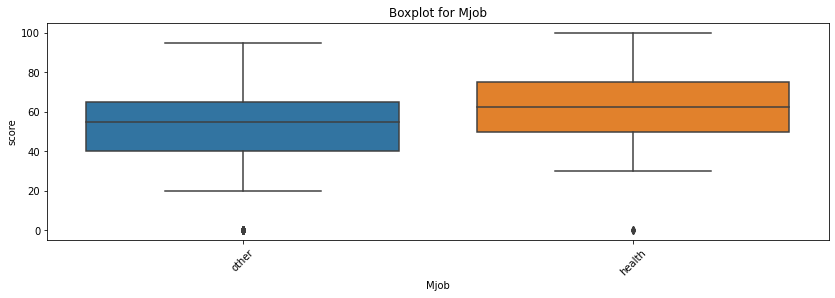

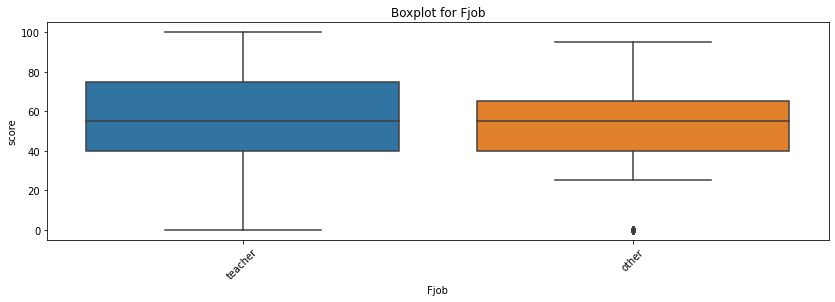

In [28]:
for col in ['Mjob', 'Fjob']:
    get_boxplot(col)

Как мы видим, профессии отцов-учителей и матерей, занятых в сфере здравохранения, имеют влияние на результаты экзамена по математике.

Проведем анализ статистическим методом, который позволяет сравнивать средние значения двух выборок и на основе результатов теста делать заключение о том, различаются ли они друг от друга статистически или нет.

In [29]:
# Тест Стьюдента
def get_stat_dif(col):
    # проверка на строковый тип данных
    if df.loc[:, col].dtypes == np.dtype('O'):
        # возьмем значения, упомянутые более 10 раз
        cols = df.loc[:, col].value_counts().index[:10]
        combinations_all = list(combinations(cols, 2))
        for comb in combinations_all:
            if ttest_ind(df.loc[df.loc[:, col] == comb[0], 'score'].dropna(),
                         df.loc[df.loc[:, col] == comb[1], 'score'].dropna()).pvalue \
                    <= 0.05/len(combinations_all):  # Учли поправку Бонферони
                print('Найдены статистически значимые различия для колонки', col)
                break


for col in df.columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьезно отличаются 6 параметров (6-й это Fjob). Хоть тест Стьюдента не выявил статистически значимых различий для колонки Fjob, оставим ее в датасете для дальнейшего построения модели.

На осоновании теста Стьюдента уберем из датасета номинативные признаки, которые слабо коррелируют с предсказываемой величиной (в нашем случае — score): 

In [30]:
df.drop(['famsize', 'reason', 'guardian', 'schoolsup', 'famsup',
         'paid', 'activities', 'nursery', 'internet'], inplace=True, axis=1)

Выведем получившийся датасет с важными признаками, которые, возможно, оказывают влияние на результаты экзамена по математике:

In [31]:
df.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,studytime,higher,romantic,goout,score
0,F,18,U,4.0,4.0,other,teacher,2.0,yes,no,4.0,30.0
1,F,17,U,1.0,1.0,other,other,2.0,yes,no,3.0,30.0
2,F,15,U,1.0,1.0,other,other,2.0,yes,NaN,2.0,50.0
3,F,15,U,4.0,2.0,health,teacher,3.0,yes,yes,2.0,75.0
4,F,16,U,3.0,3.0,other,other,2.0,yes,no,2.0,50.0


## 5. Выводы

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

1) В данных присутсвуют пропуски почти во всех столбцах, кроме школы, пола и возраста. Пропусков достаточно мало — 5% от общего количества данных.

2) В некоторых случаях наблюдалась низкая репрезентативность выборки: неравное распределение учеников по школам, по совместному проживанию родителей, по наличию дополнительной образовательной поддержки.

3) Выбросы наблюдались только в столбцах:
- образование отца
- семейные отношения
- количество пропущенных занятий

Это позволяет сделать вывод, что данные достаточно чистые.
 
4) Небольшая корреляционная зависимость есть между образованием матери и результатами экзамена по математике. В датасете большинсво матерей имеют высшее образование, вероятно, они часто помогали детям в обучении и уделяли чуть больше внимания этому, чем отцы.

5) Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, 
это:
- sex
- age
- address
- Medu
- Fedu
- Mjob
- Fjob
- studytime
- higher
- romantic
- goout
